<a href="https://colab.research.google.com/github/ravi-kr/DeepLearning/blob/master/Q_and_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Q Learning in Python

In [0]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))




In [3]:
STATES

16

In [4]:
ACTIONS

4

In [5]:
#  4 * 16
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [0]:
EPISODES = 3000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment
LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96
RENDER = False # if you want to see training set to true
epsilon = 0.9

In [7]:
rewards = []
for episode in range(EPISODES):

   #get the starting state in Evr. after reset
  state = env.reset()
  for _ in range(MAX_STEPS):  #Explore the env. till the max step;
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      #Random action in Envr.
      action = env.action_space.sample()  
    else:
      #next state of agent
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)
    #we dont' care about the info values _, that's why we ignore it ...

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.00259999e-03 4.46490574e-01 2.67745562e-03 3.20559413e-03]
 [5.50721852e-04 6.33405285e-04 5.65416560e-04 1.89143427e-01]
 [8.63411143e-04 1.22674626e-03 1.94943997e-03 6.48163122e-02]
 [1.95256343e-03 1.93998321e-03 1.94172148e-03 3.79444100e-02]
 [3.38905279e-01 2.08398948e-03 2.41361194e-03 1.60829215e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.89006381e-01 2.94069861e-05 2.73437564e-05 3.32026668e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.37918852e-03 4.94469413e-04 5.76747029e-04 9.96753691e-02]
 [1.28647152e-03 1.37121087e-01 1.65623912e-03 6.06908945e-04]
 [3.32607301e-04 3.28172135e-03 2.13141501e-04 2.36169637e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.34884089e-02 9.59061536e-02 6.34793558e-01 7.74194815e-02]
 [2.21785191e-01 8.44458670e-01 1.64926026e-01 1.61914638e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [8]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


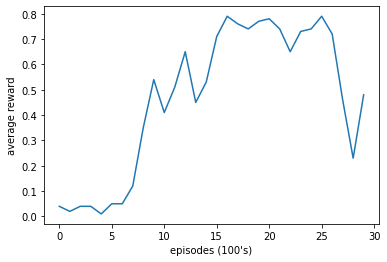

In [9]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

In [0]:
#---Sarsa Algorithm----

In [0]:

import numpy as np 
import gym 


In [0]:
env = gym.make('FrozenLake-v0') 

In [0]:

#Defining the different parameters 
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95
  
#Initializing the Q-matrix 
Q = np.zeros((env.observation_space.n, env.action_space.n)) 


In [14]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [0]:

#Function to choose the next action 
def choose_action(state): 
    action=0
    if np.random.uniform(0, 1) < epsilon: 
        action = env.action_space.sample() 
    else: 
        action = np.argmax(Q[state, :]) 
    return action 
  
#Function to learn the Q-value 
def update(state, state2, reward, action, action2): 
    predict = Q[state, action] 
    target = reward + gamma * Q[state2, action2] 
    Q[state, action] = Q[state, action] + alpha * (target - predict) 


In [16]:

#Initializing the reward 
reward=0
  
# Starting the SARSA learning 
for episode in range(total_episodes): 
    t = 0
    state1 = env.reset() 
    action1 = choose_action(state1) 
  
    while t < max_steps: 
        #Visualizing the training 
        env.render() 
          
        #Getting the next state 
        state2, reward, done, info = env.step(action1) 
  
        #Choosing the next action 
        action2 = choose_action(state2) 
          
        #Learning the Q-value 
        update(state1, state2, reward, action1, action2) 
  
        state1 = state2 
        action1 = action2 
          
        #Updating the respective vaLues 
        t += 1
        reward += 1
          
        #If at the end of learning process 
        if done: 
            break


Streaming output truncated to the last 5000 lines.
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)

In [17]:

#Evaluating the performance 
print ("Performace : ", reward/total_episodes) 
  
#Visualizing the Q-matrix 
print(Q) 


Performace :  0.0001
[[3.85119997e-04 1.45877746e-03 4.52689772e-04 2.65704389e-03]
 [1.79977696e-04 1.23103725e-04 1.73666147e-04 7.89467007e-04]
 [3.56912697e-03 1.08341483e-03 1.04291036e-03 1.63742414e-03]
 [3.37891214e-03 1.98499897e-04 4.04155062e-04 8.63252496e-04]
 [2.30471206e-03 3.89283622e-02 3.70774294e-01 6.39848415e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.51002443e-04 8.69196460e-04 9.29605632e-05 9.49442802e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.78738116e-04 6.88928922e-02 7.23066337e-03 1.33372262e-02]
 [1.74593103e-05 8.84169981e-02 1.26694811e-02 5.15997555e-03]
 [8.88997160e-02 1.47925034e-01 7.91348841e-01 7.17602818e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.04399637e-03 1.95384886e-01 5.70657355e-01 1.27709405e-01]
 [2.02218879e-02 9.96702447e-01 8.77240300e-01 9.79468976e-01]
 [0.00000000e+00 0.00000000e+00 0.